<a href="https://colab.research.google.com/github/Gargi030120/project1/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import numpy as np
import cv2
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [5]:
def load_images_from_folder(folder_path,target_size=(92,112)):
  images=[]
  labels=[]
  for subdir in os.listdir(folder_path):
    subfolder_path=os.path.join(folder_path,subdir)
    if not os.path.isdir(subfolder_path):
      continue

    label=int(subdir[1:])
    for filename in os.listdir(subfolder_path):
      image_path=os.path.join(subfolder_path,filename)
      image=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
      if image is not None:
        image=cv2.resize(image,target_size)
        images.append(image)
        labels.append(label)
  return np.array(images),np.array(labels)

dataset_folder="drive/MyDrive/ORL"
images,labels=load_images_from_folder(dataset_folder)
print("Number of images loaded",len(images))
print("Number of labels loaded",len(labels))

Number of images loaded 283
Number of labels loaded 283


In [6]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=42)

In [7]:
X_train.shape
X_test.shape

(57, 112, 92)

In [8]:
nsamples, nx, ny=X_train.shape
d2_train_dataset=X_train.reshape((nsamples,nx*ny))
d2_train_dataset

array([[ 28,  25,  28, ..., 182, 183, 178],
       [ 48,  44,  49, ...,  38,  35,  44],
       [ 54,  52,  49, ...,  33,  33,  32],
       ...,
       [128, 123, 128, ...,  79,  77,  83],
       [128, 125, 125, ...,  45,  31,  30],
       [118, 122, 118, ...,  78,  62,  62]], dtype=uint8)

In [9]:
nsamples, nx, ny=X_test.shape
d2_test_dataset=X_test.reshape((nsamples,nx*ny))
d2_test_dataset

array([[132, 118, 124, ...,  56,  67,  62],
       [ 88,  85,  89, ..., 117, 117, 116],
       [ 41,  49,  45, ...,  18,  28,  21],
       ...,
       [124, 124, 123, ...,  99, 102,  95],
       [117, 113, 118, ...,  78,  85,  82],
       [ 42,  44,  39, ...,  22,  28,  18]], dtype=uint8)

In [10]:
n=80
pca=PCA(n_components=n,random_state=42)
X_train_pca=pca.fit_transform(d2_train_dataset)
X_test_pca=pca.transform(d2_test_dataset)

In [11]:
svm_classifier=SVC()
svm_classifier.fit(X_train_pca,y_train)

SVC()

In [12]:
y_pred=svm_classifier.predict(X_test_pca)
y_pred

array([10, 39, 27, 34, 18,  8,  7, 29, 14, 29, 15,  8, 28, 38,  1, 35, 39,
       32, 37, 14, 24, 16, 17, 35, 16,  2, 18, 28,  8, 23, 39, 33,  3, 15,
       16, 34, 17, 19,  8, 25,  1, 11, 11, 27, 18, 34, 36, 39,  2, 34, 29,
        3,  2,  1, 25,  8, 27])

In [13]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy',accuracy)

Accuracy 0.9649122807017544


In [14]:
print(confusion_matrix(y_test,y_pred))

[[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 

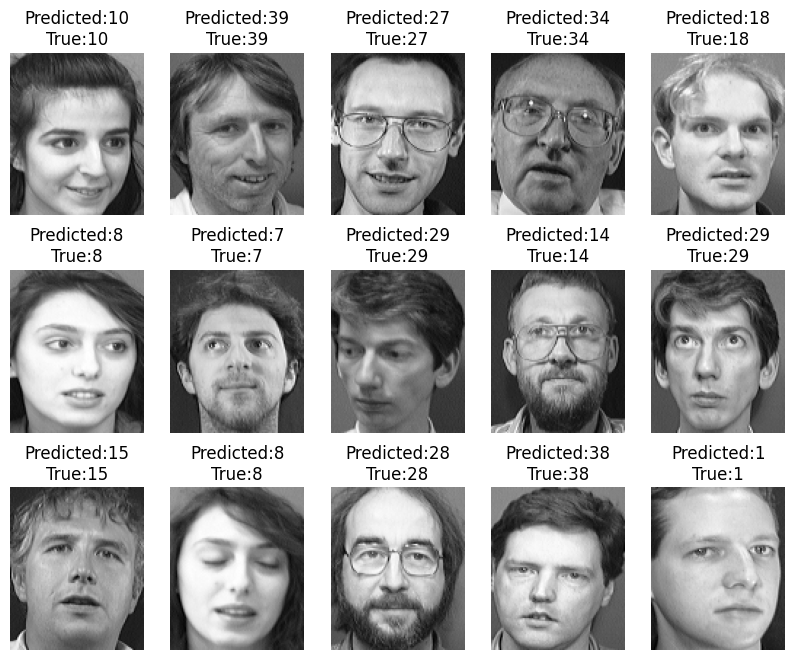

In [15]:
plt.figure(figsize=(10,8))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(X_test[i],cmap='gray')
  plt.title(f"Predicted:{y_pred[i]}\nTrue:{y_test[i]}")
  plt.axis('off')
plt.show()

In [17]:
from skimage.io import imread
from skimage.transform import resize
pgm_image_path='drive/MyDrive/ORL/s32/4.pgm'
pgm_image=imread(pgm_image_path)
nsamples, nx, ny=(1,112,92)
flattened_image=pgm_image.reshape((nsamples,nx*ny))
image_pca=pca.transform(flattened_image)
predicted_label=svm_classifier.predict(image_pca)
predicted_label

array([32])

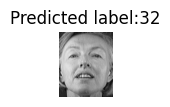

In [18]:
plt.figure(figsize=(92,112))
for i,(image,label) in enumerate(zip(pgm_image,predicted_label)):
  plt.subplot(1,len(pgm_image),1)
  plt.imshow(pgm_image,cmap='gray')
  plt.title(f"Predicted label:{label}")
  plt.axis('off')
plt.show()